<a href="https://colab.research.google.com/github/Sany20/Crop_yield_production_in_India/blob/main/Crop_yield_prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("ggplot")

In [3]:
df=pd.read_csv('yield_df.csv')

In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [6]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [8]:
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [9]:
df.dtypes

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df['Area']=df['Area'].astype("string")
df['Item']= df['Item'].astype("string")

In [12]:
df.dtypes

Area                             string[python]
Item                             string[python]
Year                                      int64
hg/ha_yield                               int64
average_rain_fall_mm_per_year           float64
pesticides_tonnes                       float64
avg_temp                                float64
dtype: object

In [13]:
df.duplicated().sum()

2310

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  string 
 1   Item                           25932 non-null  string 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), string(2)
memory usage: 1.6 MB


In [17]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


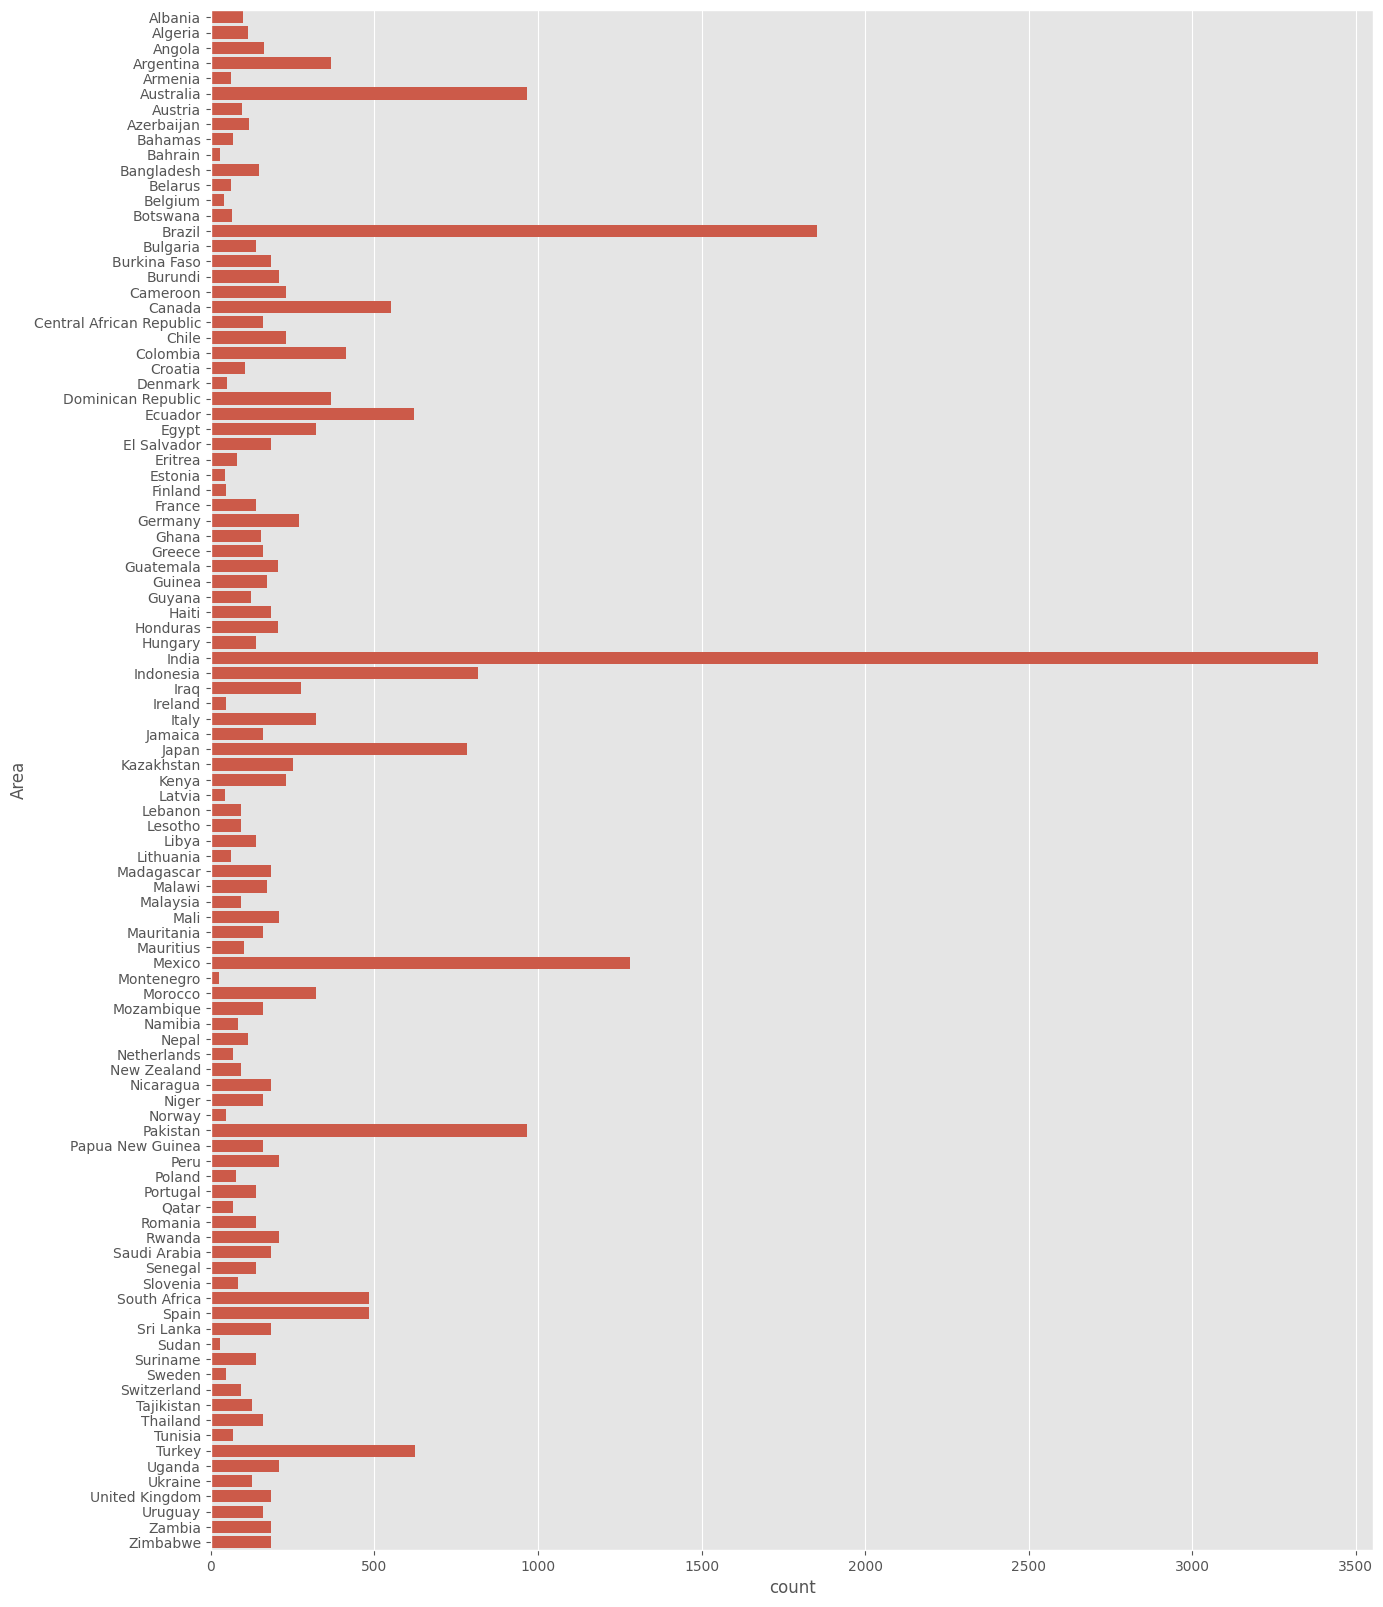

In [18]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

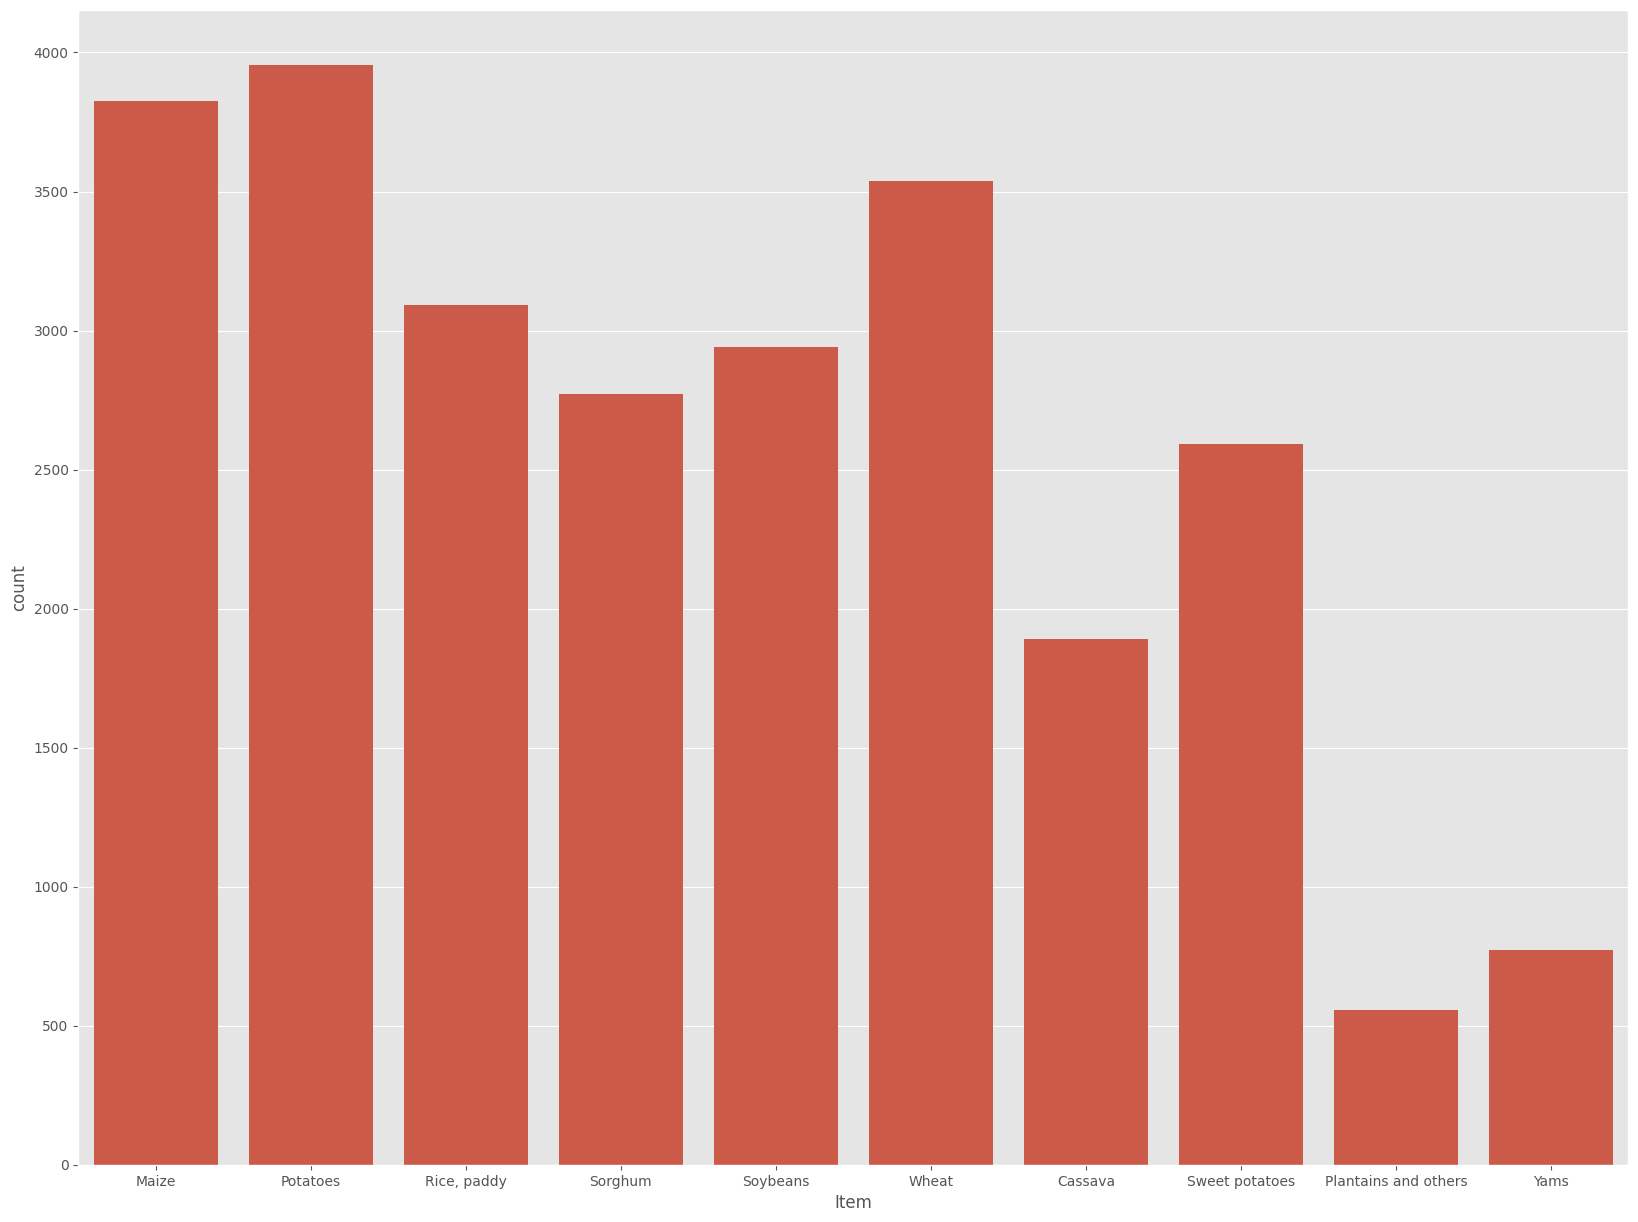

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['Item'])
plt.show()

In [21]:
index_names = df[df['Area'] != 'India'].index

In [22]:
df.drop(index_names, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3384 entries, 10502 to 14549
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           3384 non-null   string 
 1   Item                           3384 non-null   string 
 2   Year                           3384 non-null   int64  
 3   hg/ha_yield                    3384 non-null   int64  
 4   average_rain_fall_mm_per_year  3384 non-null   float64
 5   pesticides_tonnes              3384 non-null   float64
 6   avg_temp                       3384 non-null   float64
dtypes: float64(3), int64(2), string(2)
memory usage: 211.5 KB


In [25]:
df.Item.unique()

<StringArray>
[       'Cassava',          'Maize',       'Potatoes',    'Rice, paddy',
        'Sorghum',       'Soybeans', 'Sweet potatoes',          'Wheat']
Length: 8, dtype: string

In [26]:
df.drop(columns=['Area'],inplace=True)

In [27]:
df.head()
df.tail()

,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
14544,Wheat,2013,31538,1083.0,45620.0,25.85
14545,Wheat,2013,31538,1083.0,45620.0,27.14
14546,Wheat,2013,31538,1083.0,45620.0,25.98
14547,Wheat,2013,31538,1083.0,45620.0,27.44
14549,Wheat,2013,31538,1083.0,45620.0,26.99


In [28]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Item', 'hg/ha_yield']

In [29]:
df = df[col]

In [30]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item,hg/ha_yield
10502,1990,1083.0,75000.0,25.58,Cassava,205381
10503,1990,1083.0,75000.0,26.88,Cassava,205381
10504,1990,1083.0,75000.0,25.79,Cassava,205381
10505,1990,1083.0,75000.0,24.10,Cassava,205381
10506,1990,1083.0,75000.0,25.25,Cassava,205381


In [31]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4])
    ],
    remainder = 'passthrough'
)
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy  = preprocesser.fit_transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")

Linear Regression: mae : 11351.515020552857 score : 0.9655493554823231
Lasso: mae : 11348.547910932952 score : 0.9655567920091271
Ridge: mae : 11151.42908641074 score : 0.9657802213712906
Decision Tree: mae : 744.2658788774003 score : 0.998800587934438
KNN: mae : 3537.179025110783 score : 0.984345878103987


In [35]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([239523.,   8235.,  26972.,   9621.,   7715.,  31158.,  10415.,
        15946.,  28022.,  26092.,  86907.,  16015., 252815.,   8443.,
         7639.,  28508.,  88588.,  23940.,  84850.,  88368.,   9487.,
        10123.,  32366.,  11001.,  86907.,   8443., 269087.,  15178.,
       347555., 162720.,  29886.,   9487.,  24140.,  31537.,  85962.,
       227606.,  36909.,  85694.,  10121., 230430.,  29886.,   8981.,
        23796.,  15178.,  10857.,  79663.,  11998., 270436., 162720.,
       149024.,   7624.,  10734.,  36909., 227240., 349594., 185920.,
         7161.,   9400.,  32509.,   7161.,  88588.,   8443.,  36070.,
       335407.,  85694.,  32924.,  12351.,  86907., 269087.,  86849.,
       164101.,   8443., 199299., 162540., 186443., 192973.,  10789.,
         8235.,  80716.,  28395., 194173.,  85962., 194173.,  80716.,
        26789., 227606.,   7602.,  27081., 101288.,   9082.,  82835.,
       162540.,  10145., 162540.,  27081.,  31537., 164101.,  85744.,
         9106.,  237

In [36]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [39]:
Year= int(input("Enter Year: "))
avg_rain = float(input("Enter the average rainfall in your region in mm: "))
pesticides_ton = float(input("Enter pesticides used in tonnes: "))
avg_temp = float(input("Enter average temperature in you region: "))
Itemp = input("Enter the name of item whose production result you want to predict: ")
result = prediction(Year, avg_rain,	pesticides_ton, avg_temp,	Itemp)

Enter Year: 2024
Enter the average rainfall in your region in mm: 741
Enter pesticides used in tonnes: 45620.0
Enter average temperature in you region: 24
Enter the name of item whose production result you want to predict: Wheat


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [38]:
print(f"The {Itemp} will yield {result} hg/ha")

The Wheat will yield 28395.0 hg/ha
